Full Name: Sodiq Jinad

Zindi Username: Sordhiq

Github: github.com/Sordhiq

--------------------------------

-------------------------

### Wazobia Real Estate Limited

--------------------------------------------------------------------------------------------------

Wazobia Real Estate Limited is a prominent real estate company operating in Nigeria. With a vast portfolio of properties, they strive to provide accurate and competitive pricing for houses. However, they have been facing challenges in accurately predicting the prices of houses in the current market. To overcome this hurdle, I will be attempting to develop a robust predictive model for Wazobia Real Estate Limited.

The objective of this hackathon is to create a powerful and accurate predictive model that can estimate the prices of houses in Nigeria. By leveraging the provided dataset, I am analyzing various factors that impact house prices, identify meaningful patterns, and build a model that can generate reliable price predictions. The ultimate goal is to provide Wazobia Real Estate Limited with an effective tool to make informed pricing decisions and enhance their competitiveness in the market.

By developing this model solution, I will be making a significant impact on the operations and growth of Wazobia Real Estate Limited. My data-driven solution will empower the company to overcome their pricing challenges, improve their market position, and deliver enhanced value to their customers.

----------------------

In [1]:
# Importing all necessary libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import  metrics
from xgboost import XGBRegressor

from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingRegressor

from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import  StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading in the train, test and submission sample datasets

train = pd.read_csv("Housing_dataset_train.csv")
test = pd.read_csv("Housing_dataset_test.csv")
submission = pd.read_csv("Sample_submission.csv")

In [3]:
# Inspecting features and first 5 rows of the train dataset

train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [4]:
# Inspecting the last 5 rows of the train dataset

train.tail()

,ID,loc,title,bedroom,bathroom,parking_space,price
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718
13999,8787,Nasarawa,NaN,9.0,7.0,5.0,2858516.890


In [5]:
# Inspecting the shape of the train dataset

train.shape
print("The data has:\n\n","Rows:", train.shape[0],"\n","Columns:", train.shape[1])

The data has:

 Rows: 14000 
 Columns: 7


The train data has `1,400` rows and `7` columns/features 

In [6]:
# Inspecting the datatypes of all columns

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [7]:
# Looking the summary statistics and percentiles of numerical features

train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


From the table of `descriptive statistics`, it could be seen that 
(i). An average property would comprise `4 bedrooms, 3 bathrooms, 3 parking space` and cost around `N2million` 
(ii). The `least expensive` property does have `1 bedroom, 1 bathroom, 1 parking space` and a little above `N400,000` 
(iii). The `most expensive property` comprise` 9 bedrooms, 7 bathrooms and 6 parking space` with price exceeding over `N16million` .

In [8]:
# Looking out for unique elements which comprises each features

train.nunique()

ID               10182
loc                 36
title               10
bedroom              9
bathroom             7
parking_space        6
price            10727
dtype: int64

In [9]:
# Inspecting the Skewness of the train data

train.skew()

ID               0.610108
bedroom          0.390922
bathroom         0.633202
parking_space    0.249415
price            2.451809
dtype: float64

From the `Skewness` function above, it could be deduced that the train data is `positively skewed` with all features having majority of their `datapoints` to the `right hand` side of the distribution

In [10]:
# Inspecting the Kurtosis of the train data
 
train.kurtosis()

ID               -0.949480
bedroom          -0.904073
bathroom         -0.982368
parking_space    -1.014354
price            15.218322
dtype: float64

The `Kurtosis` function indicates a `Platykurtic` distribution among the features with the data mostly stretched around the mean. The target variable (`price`), however, exhibits a `Leptokurtic` distribution with the data points having long tails with possibility of `outliers`.

In [11]:
# Looking out for duplicate values from the train set

train.duplicated().sum()

0

In [12]:
# Looking out for missing values from the train set

train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

All columns tend to have `missing values` with the exception of the `ID` and `price` columns. The missing values will be sorted during the course of the project

Text(0.5, 1.0, 'Heatmap of Missing values')

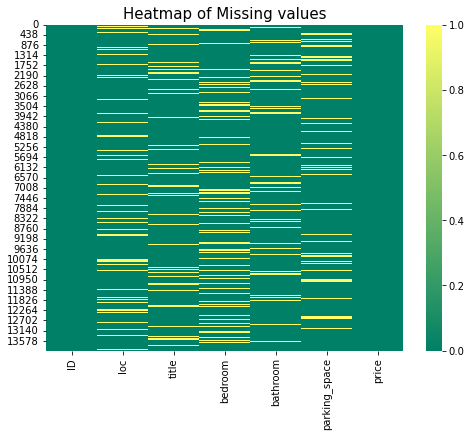

In [13]:
# Heatmap of missing values

plt.figure(figsize=(8, 6))
sns.heatmap(train.isnull(), cmap='summer')
plt.title("Heatmap of Missing values", fontsize=15)

In [14]:
# Looking at average property price by property type

train.groupby(by=["title"]).mean().sort_values(by='price', ascending=False)

,ID,bedroom,bathroom,parking_space,price
title,,,,,
Mansion,4882.914523,4.333929,3.197880,3.115114,3.725768e+06
Penthouse,4945.607963,4.342982,2.986667,3.225177,2.628945e+06
Detached duplex,5002.801067,4.327840,3.232270,3.230906,2.205883e+06
Townhouse,5084.376036,4.298759,3.165789,3.175454,2.056125e+06
Terrace duplex,5152.398894,4.340639,3.292616,3.178505,1.927270e+06
Semi-detached duplex,4980.161663,4.414903,3.194770,3.202912,1.918468e+06
Bungalow,5005.518948,4.402852,3.394664,3.192619,1.733845e+06
Flat,4852.685860,4.378877,3.188295,3.146486,1.721875e+06
Apartment,4940.278738,4.344219,3.109862,3.285714,1.567004e+06


From the above grouping of `property by prices`, it's obvious that `Mansions` are the `most expensive` properties with average prices close to `N4million`. This is closely followed by `Penthouse` at over `N2.6million` and `Detached duplexes` costing over `N2million` on average. The `least expensive` properties are `flats` with average price at `N1.7million`, `Apartments` at `N1.6million` and `Cottages` costing around `N1.3million` on average.

In [15]:
# Looking at average property price by location

train.groupby(by=["loc"]).mean().sort_values(by='price', ascending=False)

,ID,bedroom,bathroom,parking_space,price
loc,,,,,
Lagos,4885.307927,4.320557,3.090301,3.042857,4.210546e+06
Bayelsa,4946.014706,4.429530,3.231293,3.044068,3.112322e+06
Rivers,4886.061920,4.293706,3.240143,3.196364,2.957098e+06
Akwa Ibom,4781.866261,4.275261,3.090592,3.142349,2.725454e+06
Delta,4699.012308,4.197802,3.119718,3.135714,2.712493e+06
Ogun,4875.284058,4.366667,3.031250,3.135889,2.564020e+06
Cross River,4874.942693,4.496667,3.124567,3.118644,2.507765e+06
Anambra,4951.118457,4.078689,3.058065,3.279365,2.337230e+06
Edo,5199.976821,4.351351,3.153846,3.386364,2.310452e+06


`Location` of a property seem to be a factor on the price of the property. Apparently, properties in `Lagos`, `Bayelsa` and `Rivers` tend to be `more expensive` than from any other parts of the country. Similarly, `Sokoto`, `Ebonyi` and `Kebbi` tend to complete the bottom list of states with the `least expensive` property prices, on average.

In [16]:
# Drilling down to see average property price by location and type of property

train.groupby(by=["loc", "title"]).mean().sort_values(by='price', ascending=False).head(20)

,,ID,bedroom,bathroom,parking_space,price
loc,title,,,,,
Lagos,Mansion,5813.303030,4.275862,3.448276,3.296296,7.933719e+06
Rivers,Mansion,4994.500000,4.843750,2.906250,3.666667,5.424667e+06
Bayelsa,Mansion,3894.800000,4.151515,3.625000,2.973684,5.116608e+06
Delta,Mansion,5033.454545,4.227273,4.000000,2.965517,4.722360e+06
Lagos,Penthouse,5302.388889,3.575758,3.187500,3.533333,4.707955e+06
Ogun,Mansion,4288.483871,4.392857,2.307692,2.541667,4.570328e+06
Lagos,Detached duplex,4085.720000,4.565217,3.043478,3.100000,4.552806e+06
Cross River,Mansion,5574.142857,5.111111,3.250000,3.185185,4.401151e+06
Akwa Ibom,Mansion,3925.464286,3.961538,2.227273,2.600000,4.373729e+06


Deep-diving to a more granular level to see `prices` across `location` and `property type`, `Mansions` in `Lagos` tend to be `more expensive` than any other property type across the country. This is closely followed by `Mansions` in `RIvers`, `Bayelsa` and `Delta` states. `Penthouse` in `Lagos` and `Mansions` and `Detached duplex` across `Lagos`, `Ogun`, `Cross River`, `Akwa Ibom` and `Anambra` makes the list of the `top 10` `locations` with the `most expensive` properties by `average prices`.

In [17]:
# Average property price by location and type of property

train.groupby(by=["loc", "title"]).mean().sort_values(by='price', ascending=False).tail(20)

ID   bedroom  bathroom  parking_space  \
loc     title                                                       
Niger   Cottage    1817.875000  3.333333  1.500000       2.000000   
Zamfara Cottage    1713.750000  3.600000  1.571429       3.333333   
Katsina Cottage    2005.100000  3.333333  1.400000       3.125000   
Ebonyi  Apartment  3996.281250  3.964286  3.142857       3.269231   
Taraba  Cottage    1580.250000  2.800000  1.700000       2.500000   
Bauchi  Apartment  4405.969697  3.370370  3.269231       3.035714   
        Cottage    2023.000000  3.142857  1.714286       3.142857   
Borno   Cottage    1749.466667  3.428571  1.416667       2.466667   
Adamawa Cottage    1864.533333  2.250000  1.769231       2.692308   
Benue   Cottage    1087.571429  2.166667  1.500000       2.666667   
Sokoto  Cottage    2115.000000  2.900000  1.666667       1.800000   
Ebonyi  Cottage    2180.692308  3.545455  1.500000       2.000000   
Kano    Cottage    1775.142857  2.000000  1.400000       2.333333   
Jigawa  Cottage    1680.100000  2.875000  1.375000       1.777778   
Kogi    Cottage    1419.650000  3.357143  1.600000       2.611111   
Yobe    Cottage    1738.384615  2.666667  1.333333       2.400000   
Gombe   Cottage    1863.000000  3.000000  1.250000       2.125000   
Kaduna  Cottage    1508.800000  2.500000  1.125000       3.222222   
Abia    Cottage    1960.454545  2.636364  1.333333       1.900000   
Kebbi   Cottage    1365.636364  3.714286  1.200000       2.636364   

                          price  
loc     title                    
Niger   Cottage    1.233016e+06  
Zamfara Cottage    1.221300e+06  
Katsina Cottage    1.221214e+06  
Ebonyi  Apartment  1.214168e+06  
Taraba  Cottage    1.178670e+06  
Bauchi  Apartment  1.148336e+06  
        Cottage    1.111651e+06  
Borno   Cottage    1.107902e+06  
Adamawa Cottage    1.105364e+06  
Benue   Cottage    1.057327e+06  
Sokoto  Cottage    1.051132e+06  
Ebonyi  Cottage    1.042444e+06  
Kano    Cottage    1.029871e+06  
Jigawa  Cottage    1.015624e+06  
Kogi    Cottage    9.789937e+05  
Yobe    Cottage    9.527871e+05  
Gombe   Cottage    9.359590e+05  
Kaduna  Cottage    9.266389e+05  
Abia    Cottage    9.241519e+05  
Kebbi   Cottage    8.457938e+05

On the flip side, `Cottages` in `Kogi`, `Yobe`, `Gombe`, `Kaduna`, `Abia` and `Kebbi` tend to top the list of the states with the `least expensive` properties by `average price`.

In [18]:
# Looking out for correlation/association among numerical variables

train.corr()

,ID,bedroom,bathroom,parking_space,price
ID,1.000000,0.230474,0.345121,0.165160,0.167093
bedroom,0.230474,1.000000,0.227417,0.111095,0.529145
bathroom,0.345121,0.227417,1.000000,0.178497,0.221544
parking_space,0.165160,0.111095,0.178497,1.000000,0.109211
price,0.167093,0.529145,0.221544,0.109211,1.000000


Text(0.5, 1.0, 'Correlation_Heatmap')

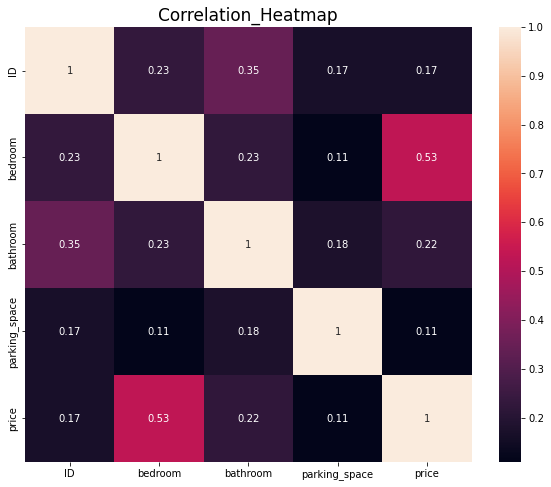

In [19]:
# Visualizing correlation with Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True).set_title("Correlation_Heatmap", fontsize=17)

From the `Correlation matrix` and `Heatmap`, a couple of relationship among variables could be established. There exists a `moderate positive` relationship `between` number of `bedrooms` and property `prices` - meaning the higher the number of bedrooms in a property, the more likely the price of the property will be higher. Similarly, there exists a `weak positive` correlation `between` number of `bathrooms` in a property and `price` of the property.

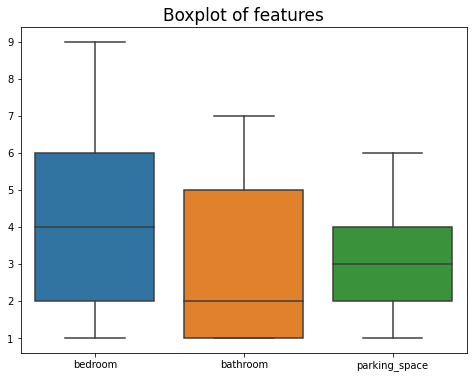

In [20]:
# Looking out for Outliers among numeric features

features = ["bedroom", "bathroom", "parking_space"]
plt.figure(figsize=(8, 6))

sns.boxplot(data=train[features])
plt.title("Boxplot of features", fontsize=17)

plt.grid(False)
plt.show()

From the above `Boxplot`, it's obvious the categorical features tend to have no `Outliers`

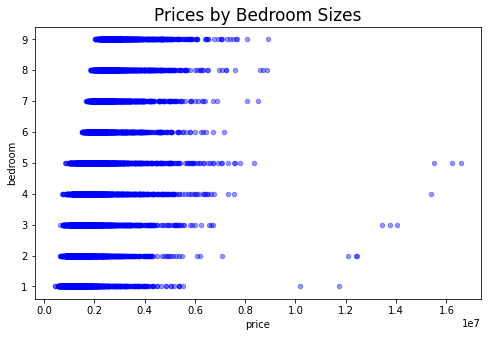

In [21]:
# Visualizing property prices by number of bedrooms

train.plot(kind='scatter', x='price', y='bedroom', color='blue', alpha=0.4, figsize=(8, 5))
plt.title("Prices by Bedroom Sizes", fontsize=17)

plt.grid(False)
plt.show()

From the above `Scatter plot`, coupled with other factors, properties with `3` to `5` `bedrooms` tend to be `more expensive` than properties with much or less number of `bedrooms`

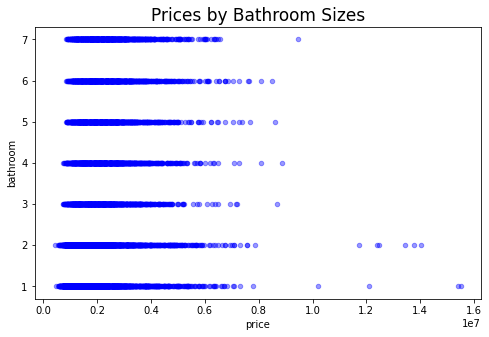

In [22]:
# Visualizing property prices by number of bathrooms

train.plot(kind='scatter', x='price', y='bathroom', color='blue', alpha=0.4, figsize=(8, 5))
plt.title("Prices by Bathroom Sizes", fontsize=17)

plt.grid(False)
plt.show()

Similarly, some of the most expensive properties only have about `1` to `2` `bathrooms`

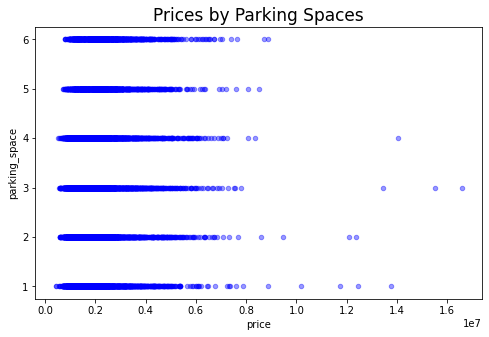

In [23]:
# Visualizing property prices by number of parking spaces

train.plot(kind='scatter', x='price', y='parking_space', color='blue', alpha=0.4, figsize=(8, 5))
plt.title("Prices by Parking Spaces", fontsize=17)

plt.grid(False)
plt.show()

Looking at `Parking spaces`, some of the most expensive properties tend to have only about `1` to `3` parking spaces.

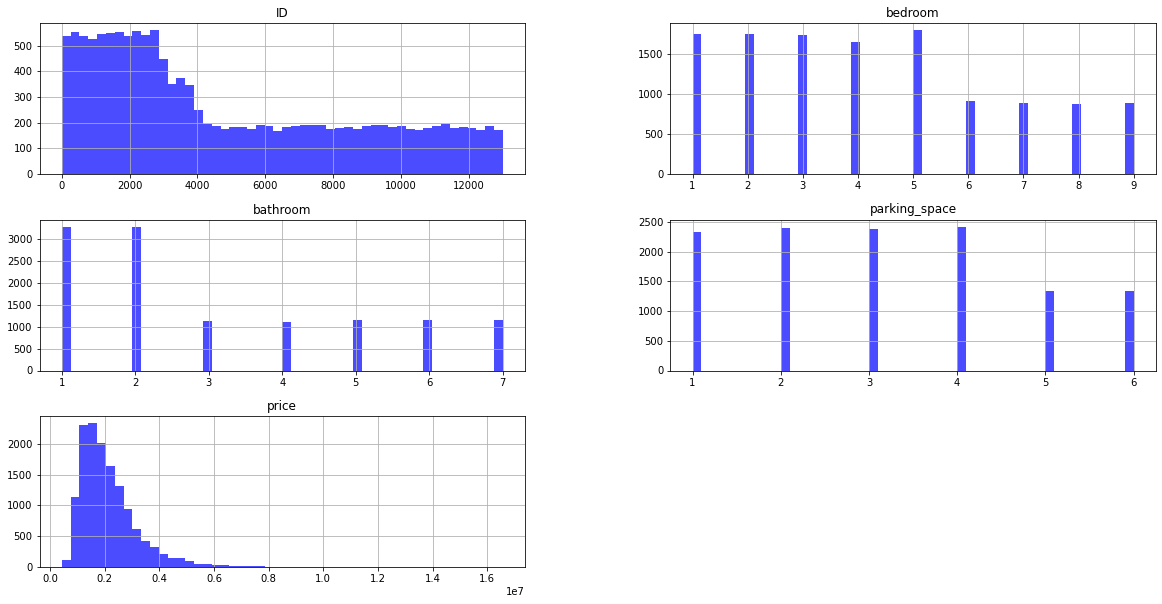

In [24]:
# Looking at the distribution of columns in the train data

train.hist(bins=50, color='blue', alpha=.7, figsize=(20, 10))
plt.grid(True, alpha=.5)
plt.show()

Looking at the `distributions` counts of the `features`, number of `bedrooms` in most properties only number `between 1` to `5`, with very few `other properties` having `more than 5` bedrooms. Similarly, `most properties` do have only about `1` to `2 bathrooms`, and `few others` do have `more than 2` bathrooms. `Parking space` is another feature which is observed to be just `between 1` to `4` for `most property` with `few others` having `more than 4` parking spaces.

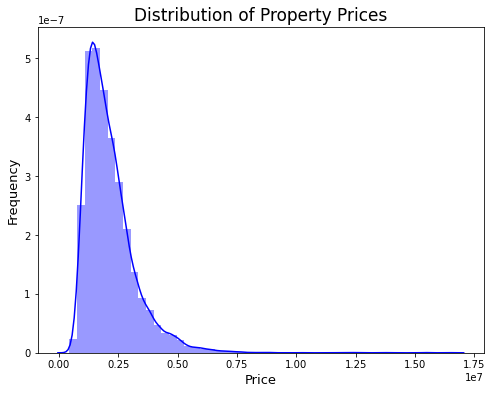

In [25]:
# Visualizing the distribution of the target variable (Price)

plt.figure(figsize=(8, 6))
sns.distplot(train['price'], kde=True, color='blue')

plt.xlabel("Price", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.title("Distribution of Property Prices", fontsize=17)

plt.grid(False)
plt.show()

As earlier stated, the target variable (`price`) is relatively `normally distributed` with long heavy tails to the right suggesting the presence of `Outliers` as indicated by the `Leptokurtic` curve.

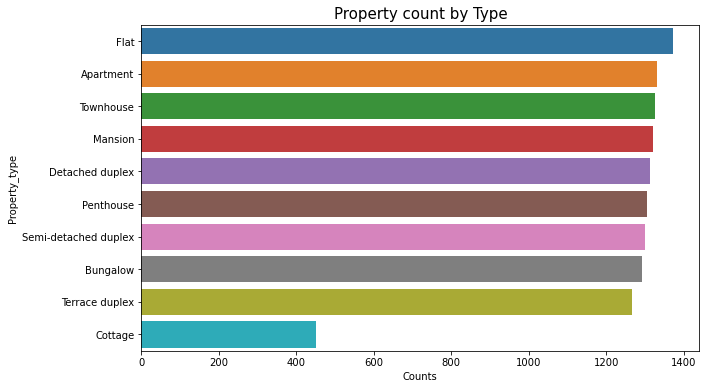

In [26]:
# Count of property by type

plt.figure(figsize=(10, 6))
sns.countplot(y=train['title'].explode(), order=train['title'].explode().value_counts().index)

plt.ylabel('Property_type')
plt.xlabel('Counts')
plt.title('Property count by Type', fontsize=15)

plt.yticks(rotation=0)
plt.show()

Looking at count of `property types` across states of the federation, there seem to be `more` of `Flats`, `Apartments` and `Townhouse`, than other form of structures, with `Cottage` being the `least` popular property type among property owners.

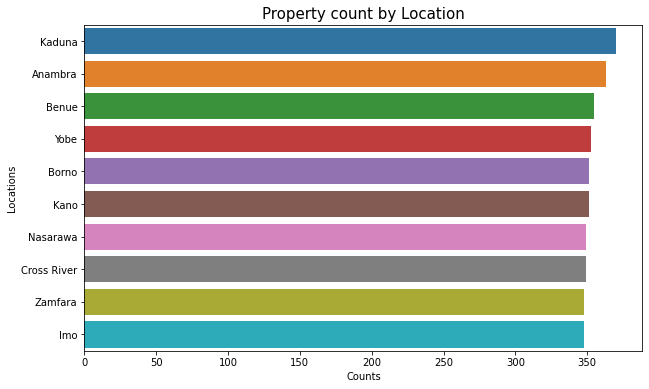

In [27]:
# Count of properties by location

plt.figure(figsize=(10, 6))
sns.countplot(y='loc', data=train, order=train['loc'].value_counts().head(10).index)

plt.ylabel('Locations')
plt.xlabel('Counts')
plt.title('Property count by Location', fontsize=15)
plt.show()

Similarly, there seem to be more properties located in states like `Kaduna`, `Anambra` and `Benue` states. With least number of properties seen across locations like `Cross River`, `Zamfara` and `Imo` states respectively.

#### Feature Engineering/Data Preprocessing

In [28]:
# Instantiating the Label Encoder class encode categorical variables

label = LabelEncoder()

In [29]:
# Fitting and transforming the Location feature

train['loc'] = label.fit_transform(train['loc'])
train['loc']

0        19
1        27
2        12
3         3
4        21
         ..
13995    11
13996    17
13997    30
13998     9
13999    24
Name: loc, Length: 14000, dtype: int32

In [30]:
# Fitting and transforming the Property type feature

train['title'] = label.fit_transform(train['title'])
train['title']

0         7
1         0
2        10
3         3
4         8
         ..
13995     1
13996     0
13997     1
13998     4
13999    10
Name: title, Length: 14000, dtype: int32

In [31]:
# Defining the feature variables

x = train.drop(['ID', 'price'], axis=1)


In [32]:
# Instantiating and imputting for missing values

simple = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
X = simple.fit_transform(x)
X

array([[19.,  7.,  2.,  2.,  1.],
       [27.,  0.,  5.,  2.,  4.],
       [12., 10.,  7.,  5.,  4.],
       ...,
       [30.,  1.,  8.,  6.,  5.],
       [ 9.,  4.,  5.,  6.,  1.],
       [24., 10.,  9.,  7.,  5.]])

In [33]:
# The target variable

y = train['price']
y

0        1149999.565
1        1672416.689
2        3364799.814
3        2410306.756
4        2600700.898
            ...     
13995    2367927.861
13996    2228516.471
13997    2406812.693
13998    3348918.718
13999    2858516.890
Name: price, Length: 14000, dtype: float64

In [34]:
# Training and testing of features and target data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=11)

In [35]:
# Defining a function to compute model's RMSE

def rmse(model):
    pred = model.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(pred, y_test))

    return rmse

In [36]:
# Instantiating and fitting the regression model

xgb = XGBRegressor(random_state=11, n_estimators=100, n_jobs=1, max_leaves=20)
xgb.fit(X_train, y_train)
rmse(xgb)

570960.7657611506

Behind fitting the trained data on the `XGB Regressor`, the model was able to predict `prices` of properties with an `error` of over `N570,000`. Good but could be made better through attempting some `ensembling techniques`.

In [37]:
# Instantiating, fitting and ensembling the regression model

bag = BaggingRegressor(n_estimators=100, n_jobs=10, base_estimator=xgb)
bag.fit(X_train, y_train)
rmse(bag)

569628.9399484005

The `Bagging` ensembling technique employed tend to `improve` the model's `performance` slightly by predicting property prices with an error of `N560,000`.

In [38]:
# Choosing the final model to predict on the Test data

pred = bag.predict(X_test)

Since the `Bagging` predictive `model` tend to `perform better`. Hence, this model will be employed in `predicting` property `prices` on the `Test set`.

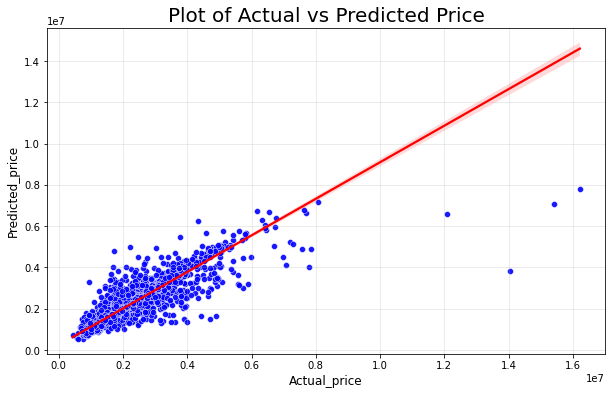

In [39]:
# Visualizing for actual price against predicted price

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=pred, color='blue', alpha=.90)
sns.regplot(x=y_test, y=pred, color='red', scatter=False, robust=1)

plt.xlabel("Actual_price", fontsize=12)
plt.ylabel("Predicted_price", fontsize=12)
plt.title("Plot of Actual vs Predicted Price", fontsize=20)

plt.grid(True, alpha=.30)
plt.show()

Comparing the `actual` and `predicted prices` of properties, it is obvious that both elements are `positively linearly correlated` and tended towards same plane.

In [40]:
# R2 value of the model

r2 = metrics.r2_score(y_test, pred)
r2

0.7464788520029697

Looking at the `r2 score` value of the model, about `75%` of variations in `prices` on the `test set` was shown to have been `explained` by `features` on the `train set`. An indication of `how well` the `model fits` the dataset.

### Replicating Preprocessing on Test Data

In [41]:
# Replicating all necessary preproceing done on the Train set, to the Test set

test['loc'] = label.fit_transform(test['loc'])
test['title'] = label.fit_transform(test['title'])

test = test.drop(['ID'], axis=1)

#test = scaler.fit_transform(test)

In [42]:
# Predicting property Prices on the Test set

prediction = bag.predict(test)
prediction

array([2370299.8 , 1006423.94, 1137565.2 , ..., 1971644.1 , 1290506.1 ,
       3700385.  ], dtype=float32)

In [43]:
# Converting output into Dataframe for submission

submit = pd.DataFrame({'ID': submission['ID'], 'price': prediction})
submit

,ID,price
0,845,2.370300e+06
1,1924,1.006424e+06
2,10718,1.137565e+06
3,12076,8.482363e+06
4,12254,1.839758e+06
...,...,...
5995,1594,1.693558e+06
5996,2416,2.181222e+06
5997,10195,1.971644e+06
5998,9455,1.290506e+06


In [44]:
# Output to CSV

submit.to_csv("hack_submission.csv", index=0)

In [45]:
print ("Finally! Nice to be here! \n\n Done baby!😉")

Finally! Nice to be here! 

 Done baby!😉
